In [59]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, normalize
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix 

import matplotlib.pyplot  as plt

* dataset: https://www.kaggle.com/datasets/tanliu/concrete-data-yeh/data

In [60]:
PATH = '../../data/concrete_data/'
file = os.path.join(PATH, 'Concrete_Data_Yeh.csv')
df = pd.read_csv(file)
df


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [62]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [63]:
df.duplicated().sum() 

np.int64(25)

In [64]:
df.drop_duplicates(inplace=True)

In [65]:
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [66]:
df.dtypes

cement              float64
slag                float64
flyash              float64
water               float64
superplasticizer    float64
coarseaggregate     float64
fineaggregate       float64
age                   int64
csMPa               float64
dtype: object

In [67]:
# Аналізуємо кореляцію - як значення стовпчиків залежать одна від одної (значення блізькі до 1 (не враховуючи діаганальних можна видалити - прибрати одне з них))
corr_matrics = df.corr()
corr_matrics

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
flyash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
superplasticizer,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
coarseaggregate,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
fineaggregate,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
csMPa,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


In [68]:
cor = corr_matrics['csMPa'].sort_values(ascending=False)
cor

csMPa               1.000000
cement              0.488283
superplasticizer    0.344209
age                 0.337367
slag                0.103374
flyash             -0.080648
coarseaggregate    -0.144717
fineaggregate      -0.186448
water              -0.269624
Name: csMPa, dtype: float64

In [69]:
X = df.drop('csMPa', axis=1) # незалежні змінні
y = df['csMPa']     # залежна змінна по якій робимо прогноз (її видаляємо з X   щоб не було "витоку" інформації)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state = 42 - щоб кожного разу були однакові дані при розбитті


In [70]:
# Масштабування ознак за допомогою StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # підганяємо і трансформуємо  тренувальних даних
X_test = scaler.transform(X_test) # трансформуємо тестових даних (не підганяємо, щоб не було "витоку" інформації)

1. Випадковий ліс

In [71]:
rf_reg = RandomForestRegressor(random_state=42).fit(X_train, y_train) # Випадковий ліс (тренування даних)
y_pred_rf = rf_reg.predict(X_test) #  Передбачення величини (побудова прогнозу)

In [72]:
# Розрахунки тестових даних
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("MSE", rf_mse) # чим менше, тим краще
print("MAE", rf_mae) # чим менше, тим краще
print("R2", rf_r2) # чим ближче до одиниці тим краще


MSE 27.61767342541057
MAE 3.499888001658374
R2 0.90742417282202


2. Градієнтний бустинг

In [73]:
gb_reg = GradientBoostingRegressor(random_state=42).fit(X_train, y_train)
y_pred_gr = gb_reg.predict(X_test)

# Розрахунки для тестових даних
gb_mse = mean_squared_error(y_test, y_pred_gr)
gb_mae = mean_absolute_error(y_test, y_pred_gr)
gb_r2 = r2_score(y_test, y_pred_gr)

print("MSE", gb_mse)
print("MAE", gb_mae)
print("R2", gb_r2)


MSE 31.403643872900282
MAE 4.128914301303752
R2 0.8947334099018797


3. Лінійна регресія

In [74]:
lr_reg = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr_reg.predict(X_test)

# Розрахунки для тестових даних
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print("MSE", lr_mse)
print("MAE", lr_mae)
print("R2", lr_r2)



MSE 125.2456480505019
MAE 8.895256221464194
R2 0.5801703029028777


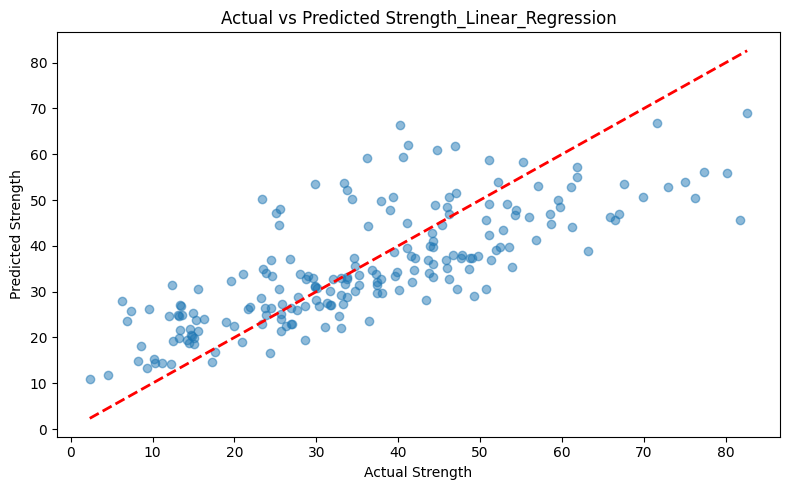

In [75]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Strength_Linear_Regression')
plt.xlabel('Actual Strength')
plt.ylabel('Predicted Strength')
plt.tight_layout()
plt.show()

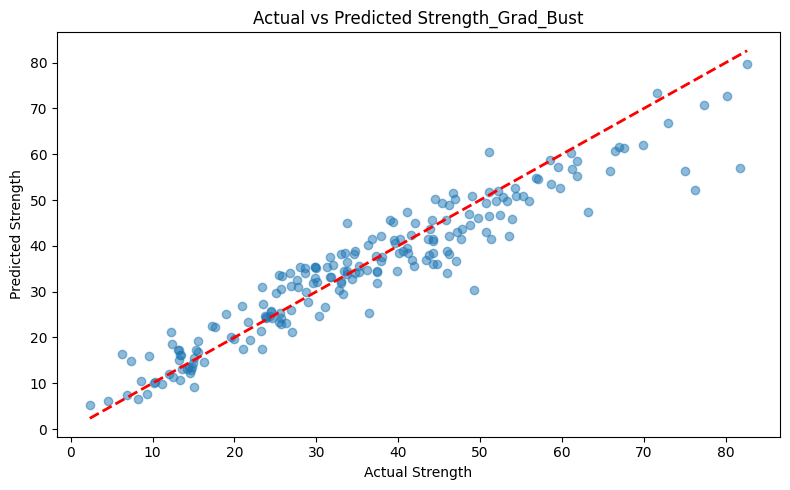

In [76]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_gr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Strength_Grad_Bust')
plt.xlabel('Actual Strength')
plt.ylabel('Predicted Strength')
plt.tight_layout()
plt.show()

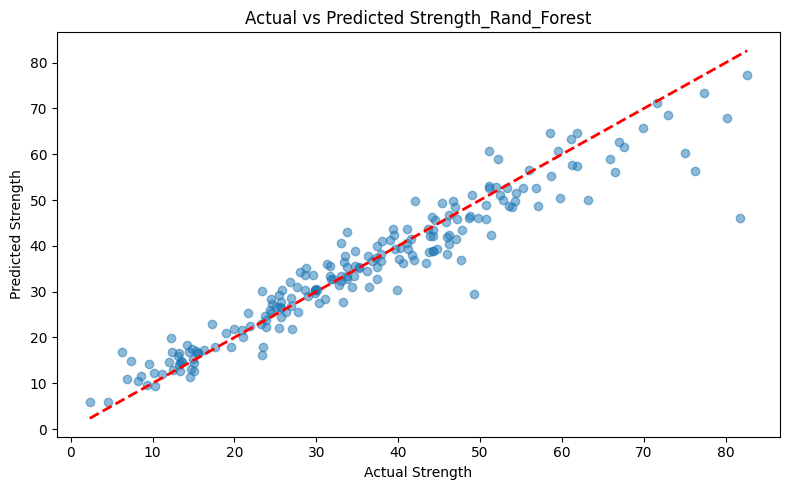

In [77]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Strength_Rand_Forest')
plt.xlabel('Actual Strength')
plt.ylabel('Predicted Strength')
plt.tight_layout()
plt.show()

In [78]:
# Параметри для моделі рендом форест
# обов'язково в наборах (списках) повинні бути параметри за зазамовчуванням GridSearchCV -  у нашому випадку
param_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_reg_gs = RandomForestRegressor(random_state=42)
rf_search = GridSearchCV(estimator=rf_reg_gs, param_grid=param_rf, cv=3) # cv-3 -> крос валідація на 3 фолди (2 для тренування, 1 для перевірки і так по черзі); estimator - Random forest можель обрано для оптимізації
rf_search.fit(X_train, y_train) # Процес навчання для кожного з параметрів зазначених у GridSearchCV, обираються параметри з найкращім результатом (оцінка точності за допомогою крос валідації)
best_rf_params = rf_search.best_params_
best_rf_params

{'max_depth': None,
 'max_features': None,
 'min_samples_split': 2,
 'n_estimators': 200}

In [79]:
rf_optimal = RandomForestRegressor(**best_rf_params, random_state=42)
rf_optimal.fit(X_train, y_train)
y_pred_rf_optimal = rf_optimal.predict(X_test)

rf_mse = mean_squared_error(y_test, y_pred_rf_optimal)
rf_mae = mean_absolute_error(y_test, y_pred_rf_optimal)
rf_r2 = r2_score(y_test, y_pred_rf_optimal)

print("MSE", rf_mse) # чим менше, тим краще
print("MAE", rf_mae) # чим менше, тим краще
print("R2", rf_r2) # чим ближче до одиниці тим краще


MSE 27.09470994111042
MAE 3.5370868005212066
R2 0.9091771726637237


In [80]:
# Вибираємо 10 випадкових індексів
random_indices = np.random.choice(X_test.shape[0], 10, replace=False)

# Створюємо DataFrame для порівняння
df_comparison = pd.DataFrame({
    "True Value (y_test)": np.array(y_test)[random_indices], # Перетворюємо у_test  масив
    "Predicted Value (y_pred_rf_optimal)": y_pred_rf_optimal[random_indices] # Використовуємо індекси
})

# Виводимо таблицю
df_comparison

,True Value (y_test),Predicted Value (y_pred_rf_optimal)
0,67.57,61.981350
1,37.34,37.478700
2,33.69,42.721350
3,38.07,41.068500
4,32.72,31.701800
5,51.04,52.636100
6,14.59,11.100500
7,25.42,22.500150
8,46.20,40.424703
9,13.36,12.687300


Задача 1. Застосувати різні методи масштабування і нормалізації даних. Проаналізувати результати

In [81]:
# Задача 1. Масштабування даних
data =np.array([[150, 70],[160, 80],[170, 90],[180, 100]])

# Масштабування за допомогою StandardScaler
standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(data)

# Масштабування за допомогою MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaled_data = min_max_scaler.fit_transform(data)

# Масштабування за допомогою RobustScaler
robust_scaler = RobustScaler()
robust_scaled_data = robust_scaler.fit_transform(data)

print("Original Data:\n", data)
print("\nScaled Data using MinMaxScaler:\n", min_max_scaled_data)
print("\nScaled Data using StandardScaler:\n", standard_scaled_data)
print("\nScaled Data using RobustScaler:\n", robust_scaled_data)

Original Data:
 [[150  70]
 [160  80]
 [170  90]
 [180 100]]

Scaled Data using MinMaxScaler:
 [[0.         0.        ]
 [0.33333333 0.33333333]
 [0.66666667 0.66666667]
 [1.         1.        ]]

Scaled Data using StandardScaler:
 [[-1.34164079 -1.34164079]
 [-0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079]]

Scaled Data using RobustScaler:
 [[-1.         -1.        ]
 [-0.33333333 -0.33333333]
 [ 0.33333333  0.33333333]
 [ 1.          1.        ]]


In [82]:
normalize(data)

array([[0.90618314, 0.42288547],
       [0.89442719, 0.4472136 ],
       [0.88378792, 0.46788772],
       [0.87415728, 0.48564293]])

Water polution data set: https://www.kaggle.com/datasets/developerghost/water-potability

In [83]:
PATH = '../../data/water_quality/'
df = pd.read_csv(os.path.join(PATH, 'Watera.csv'))
df

,ph,hardness,tds,chlorine,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,7.14,440.98,614.26,2.12,208.39,350.92,7.22,17.32,2.23,0
1,6.41,242.82,387.89,3.93,313.10,153.36,9.92,20.69,2.07,0
2,6.29,133.09,225.55,1.46,332.04,1420.43,8.76,32.87,5.05,0
3,7.39,71.89,459.23,0.56,609.63,24142.89,9.62,42.80,2.26,0
4,6.31,273.01,308.99,0.64,52.59,196.85,1.05,133.38,5.30,0
...,...,...,...,...,...,...,...,...,...,...
99995,5.41,257.02,707.62,0.04,146.47,222.71,7.67,103.63,2.88,0
99996,8.43,360.25,NaN,3.07,267.58,1708.79,0.57,154.33,2.40,0
99997,5.79,429.42,182.79,3.44,60.56,1017.59,6.38,115.63,1.61,0
99998,7.03,95.45,285.10,3.76,722.35,2614.20,10.85,116.46,2.23,0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ph               96879 non-null   float64
 1   hardness         100000 non-null  float64
 2   tds              97616 non-null   float64
 3   chlorine         100000 non-null  float64
 4   sulfate          99187 non-null   float64
 5   conductivity     98402 non-null   float64
 6   organic_carbon   100000 non-null  float64
 7   trihalomethanes  100000 non-null  float64
 8   turbidity        100000 non-null  float64
 9   potability       100000 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 7.6 MB


In [85]:
df.duplicated().sum()

np.int64(0)

In [86]:
df.isnull().sum()

ph                 3121
hardness              0
tds                2384
chlorine              0
sulfate             813
conductivity       1598
organic_carbon        0
trihalomethanes       0
turbidity             0
potability            0
dtype: int64

In [87]:
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

ph                 0
hardness           0
tds                0
chlorine           0
sulfate            0
conductivity       0
organic_carbon     0
trihalomethanes    0
turbidity          0
potability         0
dtype: int64

In [88]:
df.describe()

,ph,hardness,tds,chlorine,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,7.249512,309.214750,330.220307,2.500058,252.959861,2008.131292,7.198689,72.739011,3.139499,0.076160
std,0.979958,222.321384,243.085573,1.616047,152.332870,3996.332633,3.507656,50.389586,2.417457,0.265255
min,5.000000,0.000000,0.030000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000
25%,6.520000,151.540000,163.197500,1.230000,138.730000,726.235000,4.710000,29.997500,1.450000,0.000000
50%,7.249512,271.080000,275.265000,2.410000,238.680000,1463.315000,7.300000,68.010000,2.660000,0.000000
75%,7.950000,391.580000,375.820000,3.570000,335.712500,2151.095000,9.840000,105.700000,4.300000,0.000000
max,9.990000,1099.990000,1099.990000,8.990000,799.970000,39961.990000,17.990000,229.960000,13.990000,1.000000


In [89]:
df.value_counts(['potability'])

potability
0             92384
1              7616
Name: count, dtype: int64

In [90]:
# Обчислення кореляційної матриці для всіх числових стовпців
cor_matrics = df.corr()
cor_matrics

,ph,hardness,tds,chlorine,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
ph,1.000000,-0.000864,0.005125,-0.000145,-0.001195,0.002036,-0.003460,0.004842,-0.000587,-0.002403
hardness,-0.000864,1.000000,0.002705,0.003463,0.001945,0.000597,-0.001051,0.000348,-0.000976,-0.107681
tds,0.005125,0.002705,1.000000,-0.002323,0.001823,-0.012885,-0.002850,-0.000349,-0.000691,-0.143907
chlorine,-0.000145,0.003463,-0.002323,1.000000,0.005010,0.000903,-0.002272,-0.003355,-0.000217,-0.086605
sulfate,-0.001195,0.001945,0.001823,0.005010,1.000000,-0.003939,0.006537,0.005781,-0.003156,-0.104333
conductivity,0.002036,0.000597,-0.012885,0.000903,-0.003939,1.000000,-0.006352,0.003910,-0.001763,-0.076765
organic_carbon,-0.003460,-0.001051,-0.002850,-0.002272,0.006537,-0.006352,1.000000,-0.007654,0.001106,-0.109109
trihalomethanes,0.004842,0.000348,-0.000349,-0.003355,0.005781,0.003910,-0.007654,1.000000,-0.007724,-0.142949
turbidity,-0.000587,-0.000976,-0.000691,-0.000217,-0.003156,-0.001763,0.001106,-0.007724,1.000000,-0.086242
potability,-0.002403,-0.107681,-0.143907,-0.086605,-0.104333,-0.076765,-0.109109,-0.142949,-0.086242,1.000000


In [91]:
# Відбір стовпця потабіліті з кореляційної матриці та сортування його у порядку спадання
cor = cor_matrics['potability'].sort_values(ascending=False)
cor

potability         1.000000
ph                -0.002403
conductivity      -0.076765
turbidity         -0.086242
chlorine          -0.086605
sulfate           -0.104333
hardness          -0.107681
organic_carbon    -0.109109
trihalomethanes   -0.142949
tds               -0.143907
Name: potability, dtype: float64

In [92]:
# Розділ набору даних на навчальну та тестову вибірки
# Побудувати логістичну регресію самостійно
X = df.drop('potability', axis=1)
y = df['potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

# Масштабування ознак
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_train)

# Випадковий ліс
rf_reg = RandomForestClassifier(random_state=42).fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Розрахунки для тестових даних
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_acc = accuracy_score(y_test, y_pred_rf)

# Output
print("MSE", rf_mse)
print("MAE", rf_mae)
print("ACC", rf_acc)



MSE 0.00325
MAE 0.00325
ACC 0.99675


In [93]:
class_report = classification_report(y_test, y_pred_rf)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18524
           1       0.97      0.99      0.98      1476

    accuracy                           1.00     20000
   macro avg       0.98      0.99      0.99     20000
weighted avg       1.00      1.00      1.00     20000



In [94]:
# Обчислення матриці помилок
conf_matrix = confusion_matrix(y_test, y_pred_rf)
conf_matrix

array([[18479,    45],
       [   20,  1456]])

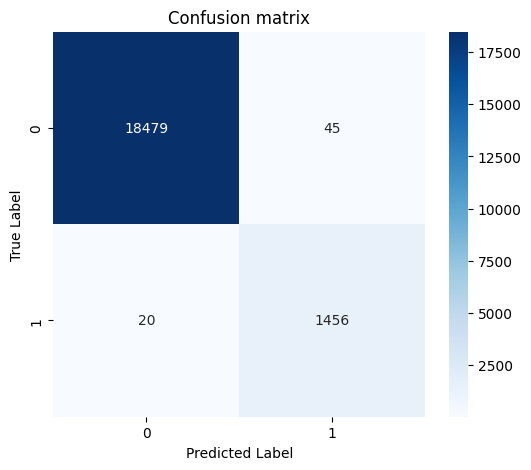

In [95]:
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot = True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion matrix')
plt.show()

In [96]:
# Градіентний бустінг
gb_reg = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)

gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_acc = accuracy_score(y_test, y_pred_gb)

print("MSE", gb_mse)
print("MAE", gb_mae)
print("ACC", gb_acc)



MSE 0.00355
MAE 0.00355
ACC 0.99645


In [97]:
class_report = classification_report(y_test, y_pred_gb)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18524
           1       0.97      0.98      0.98      1476

    accuracy                           1.00     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       1.00      1.00      1.00     20000



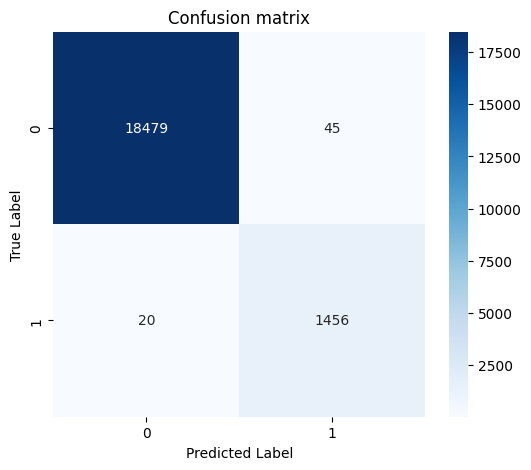

In [98]:
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot = True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion matrix')
plt.show()

In [99]:
#  Вибір 10 випадкових індексів
random_results_df = pd.DataFrame({
    'Index' : random_indices,
    'True Values': y_test.iloc[random_indices].values, 
    'Predicted Values': y_pred_gb[random_indices]
})
random_results_df

,Index,True Values,Predicted Values
0,149,0,0
1,73,0,0
2,64,0,0
3,62,0,0
4,86,0,0
5,69,1,1
6,57,0,0
7,7,0,0
8,98,0,0
9,102,0,0
